In [1]:
#importing required package
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn import set_config

from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score,roc_curve,classification_report

from feature_engine.outliers import Winsorizer
from feature_engine.encoding import CountFrequencyEncoder

C:\Users\ajay2\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("Data.csv")

In [3]:
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [4]:
#Getting rid of redudant rows by removing duplicate rows
df=df.drop_duplicates()
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [5]:
#proportion of null values present in each column
df.isnull().sum().sort_values(ascending=False)*100/len(df)

veil-type               94.785221
spore-print-color       89.616401
veil-color              87.832182
stem-root               84.592026
stem-surface            62.574069
gill-spacing            41.137173
cap-surface             23.176797
gill-attachment         16.176157
ring-type                4.055939
class                    0.000000
stem-color               0.000000
habitat                  0.000000
has-ring                 0.000000
stem-width               0.000000
cap-diameter             0.000000
stem-height              0.000000
gill-color               0.000000
does-bruise-or-bleed     0.000000
cap-color                0.000000
cap-shape                0.000000
season                   0.000000
dtype: float64

In [6]:
#Droping columns having more null values(minimum 40% null values)
df=df.drop(columns=['stem-root','veil-type','veil-color','spore-print-color','stem-surface','gill-spacing'],axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60923 entries, 0 to 61068
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 60923 non-null  object 
 1   cap-diameter          60923 non-null  float64
 2   cap-shape             60923 non-null  object 
 3   cap-surface           46803 non-null  object 
 4   cap-color             60923 non-null  object 
 5   does-bruise-or-bleed  60923 non-null  object 
 6   gill-attachment       51068 non-null  object 
 7   gill-color            60923 non-null  object 
 8   stem-height           60923 non-null  float64
 9   stem-width            60923 non-null  float64
 10  stem-color            60923 non-null  object 
 11  has-ring              60923 non-null  object 
 12  ring-type             58452 non-null  object 
 13  habitat               60923 non-null  object 
 14  season                60923 non-null  object 
dtypes: float64(3), object(12

In [8]:
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,w,16.53,17.20,w,t,p,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,3.93,6.22,y,f,f,d,a
61065,p,1.27,f,s,y,f,f,f,3.18,5.43,y,f,f,d,a
61066,p,1.27,s,s,y,f,f,f,3.86,6.37,y,f,f,d,u
61067,p,1.24,f,s,y,f,f,f,3.56,5.44,y,f,f,d,u


# EXPLORATORY DATA ANALYSIS

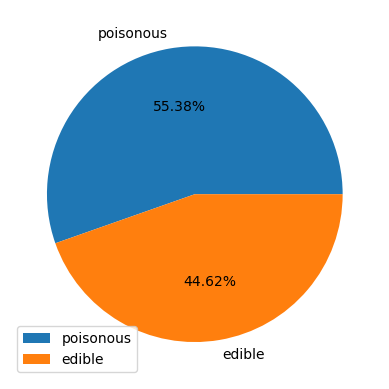

In [9]:
plt.pie(df['class'].value_counts(),autopct="%0.02f%%",labels=['poisonous','edible'])
plt.legend()

In [10]:
df['class'].value_counts()

class
p    33742
e    27181
Name: count, dtype: int64

In [11]:
num_cols=df.select_dtypes(exclude='object').columns
num_cols

Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object')

<Axes: >

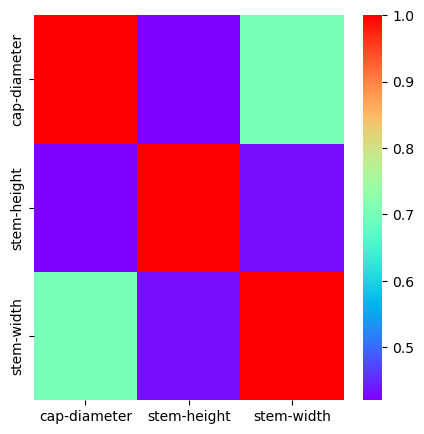

In [12]:
mat_corr=df[num_cols].corr().round(2)
plt.figure(figsize=(5,5))
sns.heatmap(mat_corr,cmap='rainbow')

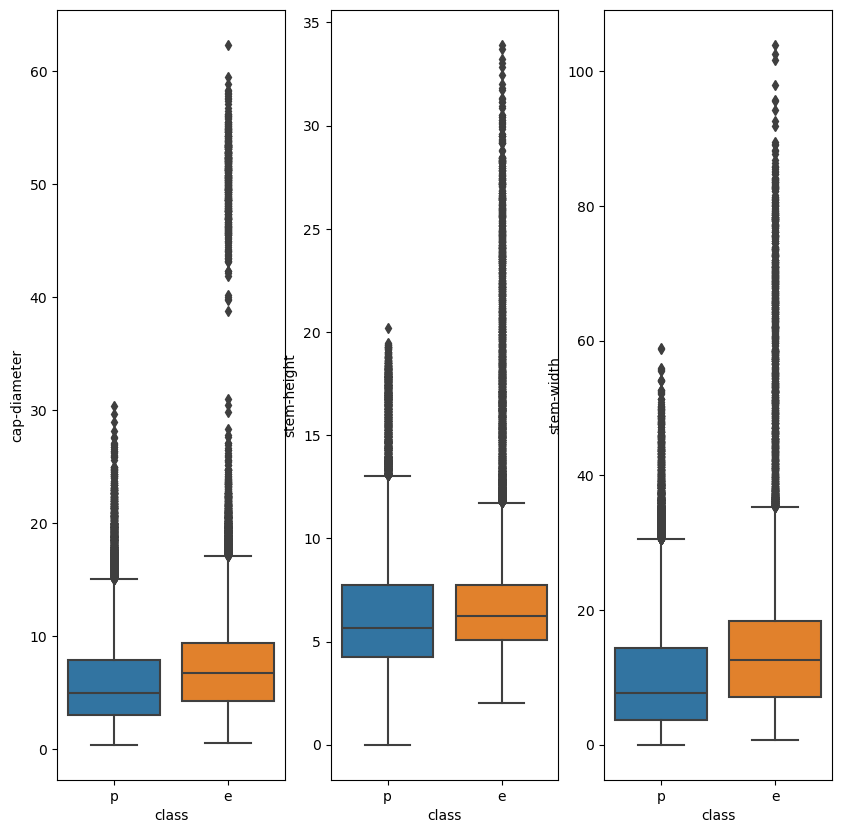

In [13]:
plt.figure(figsize=(10,10))
for i in range(len(num_cols)):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df,x='class',y=num_cols[i])

#Cap diameter and stem width seems to have more impact on mushroom class

In [14]:
cat_columns=df.select_dtypes(include='object').drop(columns=['class']).columns
cat_columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season'],
      dtype='object')

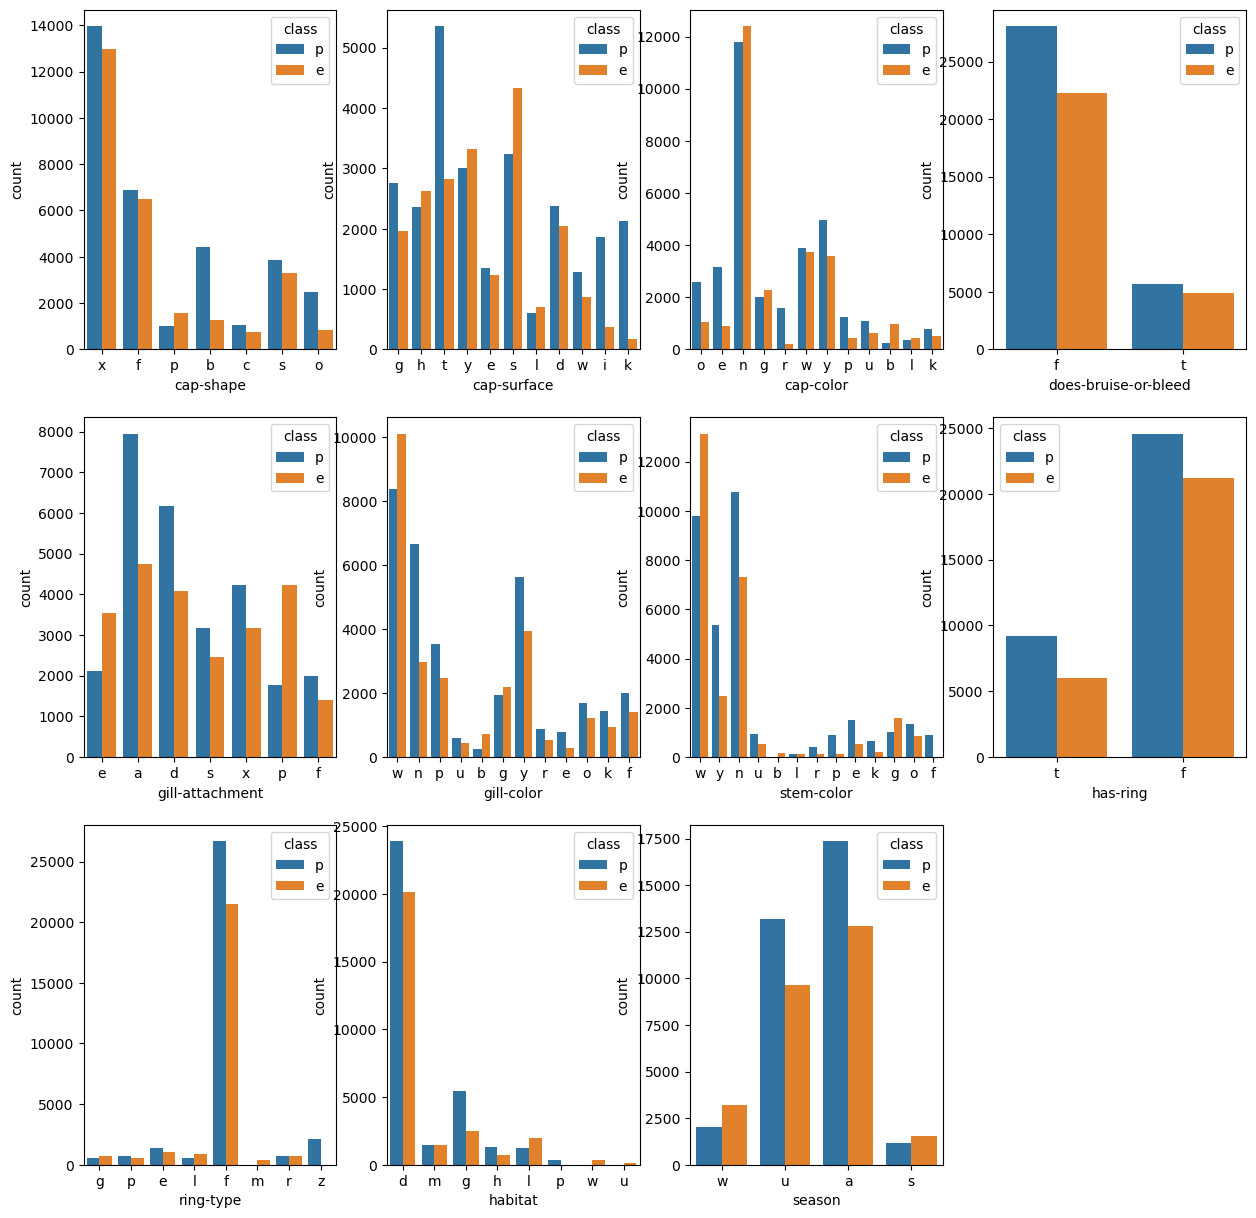

In [15]:
plt.figure(figsize=(15,15))
for i in range(len(cat_columns)):
    plt.subplot(3,4,i+1)
    sns.countplot(data=df,x=cat_columns[i],hue='class')

cap_surface,cap_color,gill_attachment,gill_color,stem_color seems to impact more on mushroom class

# Preprocessing and Feature engineering

In [16]:
#Seperating the dependent and independent variables columns
x=df.drop(columns=['class'])
y=df['class']

In [17]:
y

0        p
1        p
2        p
3        p
4        p
        ..
61064    p
61065    p
61066    p
61067    p
61068    p
Name: class, Length: 60923, dtype: object

In [18]:
#Encoding dependent variable
lable_encod=LabelEncoder()
y=lable_encod.fit_transform(y)

In [19]:
y

array([1, 1, 1, ..., 1, 1, 1])

Dependent variiable encoded as
Poisonous-1
edible-0

In [20]:
set_config(transform_output='pandas')

In [21]:
#Pipeline for numerical independent columns preprocessing
num_pipe=make_pipeline(SimpleImputer(strategy='mean'),Winsorizer(capping_method='gaussian'),StandardScaler())

In [22]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('winsorizer', Winsorizer()),
                ('standardscaler', StandardScaler())])

In [23]:
#Pipeline for categorical independent columns preprocessing
cat_pipe=make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(sparse_output=False))

In [24]:
#Combined preprocessing step of categorical and numerical columns
preprocessing=make_column_transformer((num_pipe,make_column_selector(dtype_exclude='object')),
                                      (cat_pipe,make_column_selector(dtype_include='object')))

In [25]:
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('winsorizer', Winsorizer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000225C5B5A2E0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000225C5B5A4F0>)])

In [26]:
x=preprocessing.fit_transform(x)

# Model building

In [27]:
#Splitting the data for training and testing keeping 80% for training
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
#models considered for training
lg=LogisticRegression(solver='newton-cg')
sg=SGDClassifier(random_state=42)
sv=SVC(random_state=42)
dt=DecisionTreeClassifier(random_state=42)
rf=RandomForestClassifier(random_state=42)
kn=KNeighborsClassifier()

In [29]:
list_models=[lg,sg,sv,dt,rf,kn]

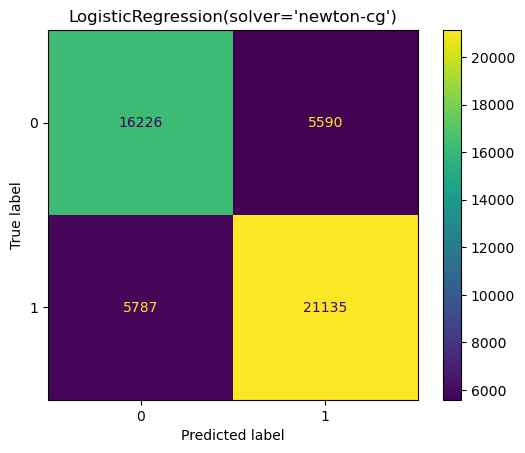

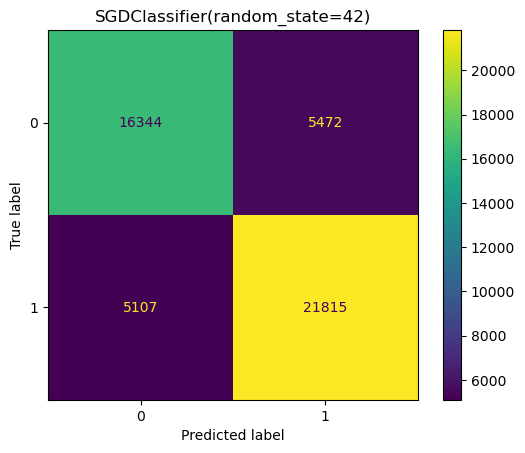

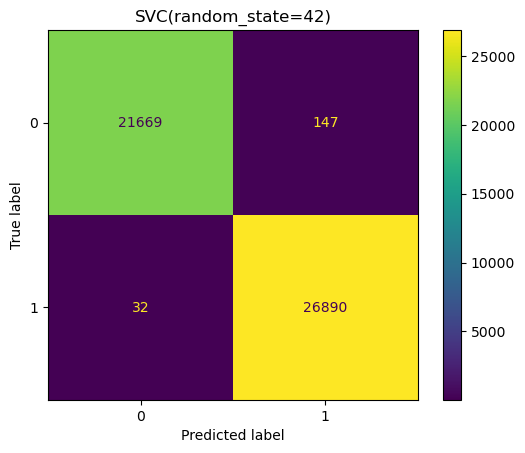

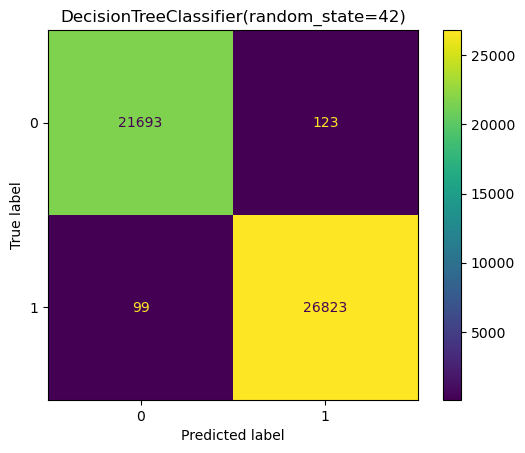

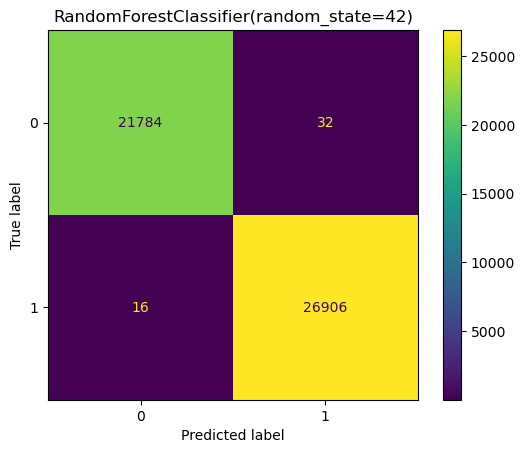

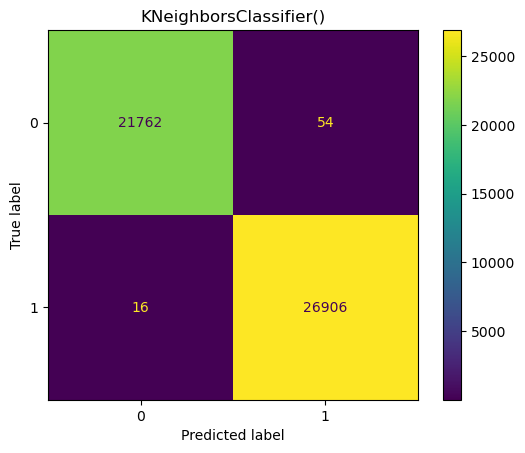

In [30]:
#Models training with cross validation=5
for model in list_models:
    model.fit(x_train,y_train)
    y_train_predict=cross_val_predict(model,x_train,y_train,cv=5)
    ConfusionMatrixDisplay.from_predictions(y_train,y_train_predict)
    plt.title(model)    

In [31]:
for model in list_models:
    model.fit(x_train,y_train)
    y_train_predict=cross_val_predict(model,x_train,y_train,cv=5)
    print(model)
    print(classification_report(y_train,y_train_predict,digits=5))
    print('*'*50)

LogisticRegression(solver='newton-cg')
              precision    recall  f1-score   support

           0    0.73711   0.74377   0.74042     21816
           1    0.79083   0.78505   0.78793     26922

    accuracy                        0.76657     48738
   macro avg    0.76397   0.76441   0.76418     48738
weighted avg    0.76679   0.76657   0.76666     48738

**************************************************
SGDClassifier(random_state=42)
              precision    recall  f1-score   support

           0    0.76192   0.74917   0.75549     21816
           1    0.79946   0.81030   0.80485     26922

    accuracy                        0.78294     48738
   macro avg    0.78069   0.77974   0.78017     48738
weighted avg    0.78266   0.78294   0.78276     48738

**************************************************
SVC(random_state=42)
              precision    recall  f1-score   support

           0    0.99853   0.99326   0.99589     21816
           1    0.99456   0.99881   0.99668 

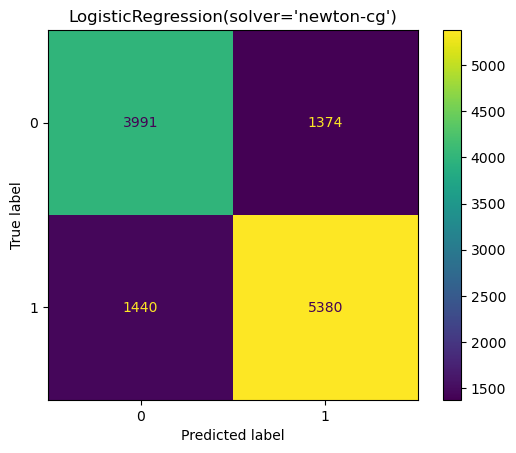

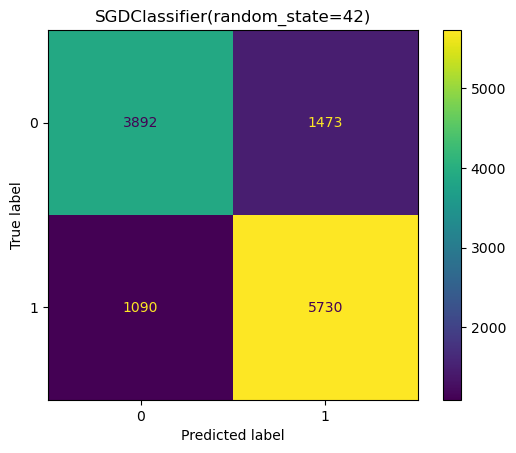

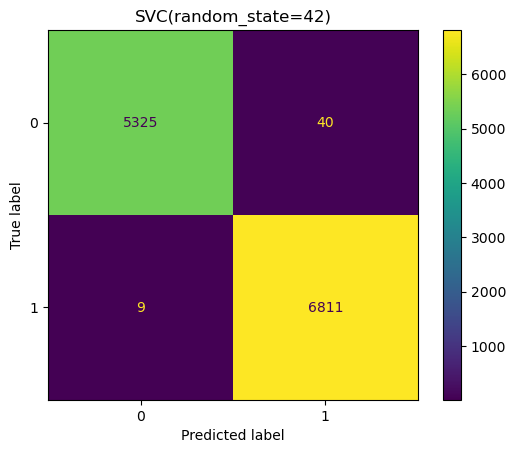

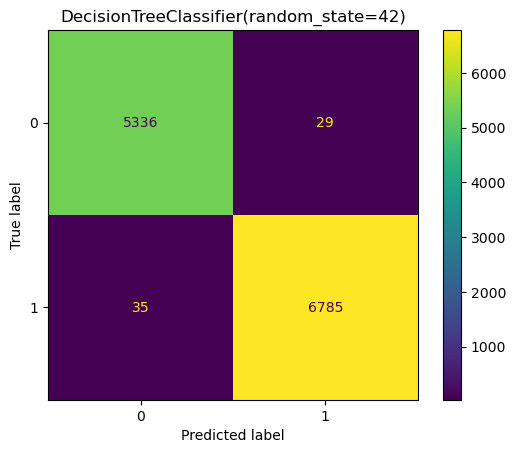

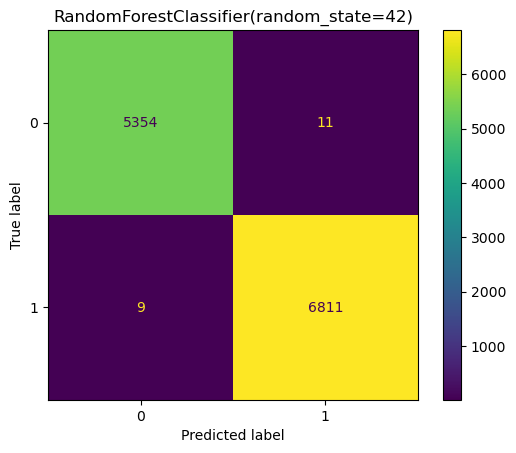

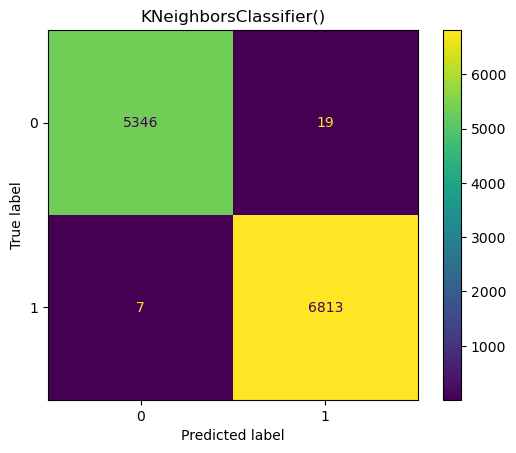

In [32]:
#Models testing on test data
for model in list_models:    
    y_test_predict=model.predict(x_test)
    ConfusionMatrixDisplay.from_predictions(y_test,y_test_predict)
    plt.title(model)

In [33]:
for model in list_models:
    y_test_predict=model.predict(x_test)   
    
    print(model)
    print(classification_report(y_test,y_test_predict,digits=5))
    print('*'*50)

LogisticRegression(solver='newton-cg')
              precision    recall  f1-score   support

           0    0.73486   0.74390   0.73935      5365
           1    0.79656   0.78886   0.79269      6820

    accuracy                        0.76906     12185
   macro avg    0.76571   0.76638   0.76602     12185
weighted avg    0.76939   0.76906   0.76920     12185

**************************************************
SGDClassifier(random_state=42)
              precision    recall  f1-score   support

           0    0.78121   0.72544   0.75230      5365
           1    0.79550   0.84018   0.81723      6820

    accuracy                        0.78966     12185
   macro avg    0.78836   0.78281   0.78476     12185
weighted avg    0.78921   0.78966   0.78864     12185

**************************************************
SVC(random_state=42)
              precision    recall  f1-score   support

           0    0.99831   0.99254   0.99542      5365
           1    0.99416   0.99868   0.99642 

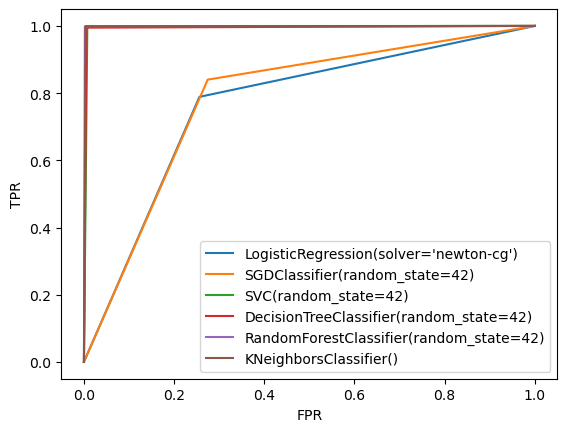

In [34]:
for model in list_models:
    fpr,tpr,_=roc_curve(y_test,model.predict(x_test))
    plt.plot(fpr,tpr,label=model)                                  #ROC-AUC CURVE
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')

In [35]:
for model in list_models:
    print('Model:',model,'\n','ROC-AUC_SCORE:', roc_auc_score(y_test,model.predict(x_test)))
    print('*'*30)    

Model: LogisticRegression(solver='newton-cg') 
 ROC-AUC_SCORE: 0.766375962371513
******************************
Model: SGDClassifier(random_state=42) 
 ROC-AUC_SCORE: 0.7828093185712763
******************************
Model: SVC(random_state=42) 
 ROC-AUC_SCORE: 0.9956123101562478
******************************
Model: DecisionTreeClassifier(random_state=42) 
 ROC-AUC_SCORE: 0.9947313148926052
******************************
Model: RandomForestClassifier(random_state=42) 
 ROC-AUC_SCORE: 0.9983150128589505
******************************
Model: KNeighborsClassifier() 
 ROC-AUC_SCORE: 0.9977160672655667
******************************


In [36]:
feature_imp=pd.Series(rf.feature_importances_,index=x_train.columns).sort_values(ascending=False)

In [39]:
feature_imp.head(20)

pipeline-1__stem-width                0.100971
pipeline-1__stem-height               0.072702
pipeline-1__cap-diameter              0.063192
pipeline-2__stem-color_w              0.039133
pipeline-2__gill-attachment_p         0.024156
pipeline-2__gill-color_w              0.022501
pipeline-2__cap-surface_t             0.020679
pipeline-2__does-bruise-or-bleed_t    0.020010
pipeline-2__does-bruise-or-bleed_f    0.019665
pipeline-2__gill-attachment_a         0.019277
pipeline-2__gill-color_y              0.018463
pipeline-2__gill-attachment_x         0.017468
pipeline-2__cap-surface_g             0.017038
pipeline-2__cap-shape_x               0.016684
pipeline-2__gill-attachment_d         0.016525
pipeline-2__stem-color_n              0.016471
pipeline-2__cap-shape_b               0.015707
pipeline-2__has-ring_f                0.015670
pipeline-2__ring-type_z               0.015423
pipeline-2__cap-surface_s             0.015085
dtype: float64